# **IEOR 4404  Simulation (Spring 2020)**

**Homework 7 [Total points: 60]**


**Due 11:59 PM, May 1st**

This 7th homework consists of application-oriented exercises focusing on practices of using `simpy` to perform discrete event simulation.


The steps to finish the homework:

*   Step 1: Answer your homework on Google Colab.
*   Step 2: Submit the copy on Google Assignment

Before you submit your assignment, make sure to re-run your code from the beginning. (You can do so by first clicking Runtime/Reset All Runtimes and then clicking Runtime/Run all)



In [0]:
#Your Name: Limeng Lu
#Your UNI: ll3359

In [69]:
#This imports all the packages you need for the homework (you might not use some of them)
#Please run this first
#we will need this for array operation
import numpy as np
#we will need this for plots
import matplotlib.pyplot as plt
#We will need this to calculate factorial on array
import scipy.misc as spm
#We will need this to do calculations related to distribution
import scipy.stats as spst

#We will need this to calculate factorial on array
import scipy.special as spsp

#Sympy
import sympy 

#simpy
!pip install simpy
import simpy

# Exercise 1 [15 Points]
##Setting 
The following code models one-server queueing system. The coding part is directly from the lecture notes. 


In [70]:
def arrival():
    lmbda=7
    i=0
    while True:
        inter_arrival=-1/lmbda*np.log(np.random.rand())
        yield env.timeout(inter_arrival)
        i+=1
        print(i,"arrival", env.now)
        env.process(service(i ))
        

def service(i ):
    #requesting the server
    rqt=desk.request()
    print(i, "request", env.now)
    #occupy/process the server request
    yield rqt
    print(i,  "start the service", env.now)
    yield env.timeout(0.2)
    print(i, "end the service", env.now)
    desk.release(rqt)
#do not remove the seed         
np.random.seed(10) 
env=simpy.Environment()
env.process(arrival())
desk=simpy.Resource(env)
T=1
env.run(until=T)

1 arrival 0.037093016021343565
1 request 0.037093016021343565
1 start the service 0.037093016021343565
1 end the service 0.23709301602134358
2 arrival 0.590680886262285
2 request 0.590680886262285
2 start the service 0.590680886262285
3 arrival 0.6558610738370955
3 request 0.6558610738370955
4 arrival 0.6971865265253847
4 request 0.6971865265253847
2 end the service 0.7906808862622849
3 start the service 0.7906808862622849
5 arrival 0.796634758364468
5 request 0.796634758364468
3 end the service 0.9906808862622849
4 start the service 0.9906808862622849


## Q1 [15 points]

Try it out the following changes. Observe how the behavior of each individual changes. Write in text to explain your observations and reasoning.

* What happens if we add `yield` before `env.process(service(i))`? Describe the changes in the output and explain why this happens. 
* What happens if we delete `yield rqt`? Describe the changes in the output and explain why this happens. 
* What happens if we delete `desk.release(rqt)`? Describe the changes in the output and explain why this happens. 

In [71]:
def arrival():
    lmbda=7
    i=0
    while True:
        inter_arrival=-1/lmbda*np.log(np.random.rand())
        yield env.timeout(inter_arrival)
        i+=1
        print(i,"arrival", env.now)
        yield env.process(service(i ))
        

def service(i ):
    #requesting the server
    rqt=desk.request()
    print(i, "request", env.now)
    #occupy/process the server request
    yield rqt
    print(i,  "start the service", env.now)
    yield env.timeout(0.2)
    print(i, "end the service", env.now)
    desk.release(rqt)
#do not remove the seed         
np.random.seed(10) 
env=simpy.Environment()
env.process(arrival())
desk=simpy.Resource(env)
T=1
env.run(until=T)

#After every customer finishes their process, then next customer can arrive.
#Because we add "yield", the process needs to finish the yield then can be back to generate a new customer.

1 arrival 0.037093016021343565
1 request 0.037093016021343565
1 start the service 0.037093016021343565
1 end the service 0.23709301602134358
2 arrival 0.790680886262285
2 request 0.790680886262285
2 start the service 0.790680886262285
2 end the service 0.9906808862622851


In [72]:
def arrival():
    lmbda=7
    i=0
    while True:
        inter_arrival=-1/lmbda*np.log(np.random.rand())
        yield env.timeout(inter_arrival)
        i+=1
        print(i,"arrival", env.now)
        env.process(service(i ))
        

def service(i ):
    #requesting the server
    rqt=desk.request()
    print(i, "request", env.now)
    #occupy/process the server request
    print(i,  "start the service", env.now)
    yield env.timeout(0.2)
    print(i, "end the service", env.now)
    desk.release(rqt)
#do not remove the seed         
np.random.seed(10) 
env=simpy.Environment()
env.process(arrival())
desk=simpy.Resource(env)
T=1
env.run(until=T)

#After every customer finishes their process, then next customer can arrive.
#Because of no yield, this progress will directly get "service" without　checking the availability of the server.

1 arrival 0.037093016021343565
1 request 0.037093016021343565
1 start the service 0.037093016021343565
1 end the service 0.23709301602134358
2 arrival 0.590680886262285
2 request 0.590680886262285
2 start the service 0.590680886262285
3 arrival 0.6558610738370955
3 request 0.6558610738370955
3 start the service 0.6558610738370955
4 arrival 0.6971865265253847
4 request 0.6971865265253847
4 start the service 0.6971865265253847
2 end the service 0.7906808862622849
5 arrival 0.796634758364468
5 request 0.796634758364468
5 start the service 0.796634758364468
3 end the service 0.8558610738370955
4 end the service 0.8971865265253847
5 end the service 0.9966347583644679


In [73]:
def arrival():
    lmbda=7
    i=0
    while True:
        inter_arrival=-1/lmbda*np.log(np.random.rand())
        yield env.timeout(inter_arrival)
        i+=1
        print(i,"arrival", env.now)
        env.process(service(i ))
        

def service(i ):
    #requesting the server
    rqt=desk.request()
    print(i, "request", env.now)
    #occupy/process the server request
    yield rqt
    print(i,  "start the service", env.now)
    yield env.timeout(0.2)
    print(i, "end the service", env.now)
#do not remove the seed         
np.random.seed(10) 
env=simpy.Environment()
env.process(arrival())
desk=simpy.Resource(env)
T=1
env.run(until=T)
#Only 1 finishes his/her service and other customers just get request and do not enjoy the service.
#Because the status of the server in the system is still "in service"

1 arrival 0.037093016021343565
1 request 0.037093016021343565
1 start the service 0.037093016021343565
1 end the service 0.23709301602134358
2 arrival 0.590680886262285
2 request 0.590680886262285
3 arrival 0.6558610738370955
3 request 0.6558610738370955
4 arrival 0.6971865265253847
4 request 0.6971865265253847
5 arrival 0.796634758364468
5 request 0.796634758364468


#Exercise 2 [30 Points]

##Setting

For the system given in Exercise 1, further assume that each customer will be leaving the queue if the service does not start within 0.1 units of time after arrival. In other words, every customer will have a "patience“ of 0.1 units of time. 

##Q1. [15 Points]

Modify the following command cell to incorporate the information given in the setting.
In addition to the existing output, print out which customer ran out of patience at what time.

[hint: the answer should consider whether running out of "patience" event happens first or service request happens first. Based on which event happens first, we finish the rest of the process differently]




In [74]:
Outcome={"arrival":[],"depart":[]}
def arrival(lmbda):
  i=0
  while True:
      inter_arrival=-1/lmbda*np.log(np.random.rand())
      yield env.timeout(inter_arrival)
      i+=1
      print(i,"arrival", env.now)
      Outcome["arrival"].append(env.now)
      env.process(service(i ))

def service(i ):
    #requesting the server
    rqt1=desk.request()
    rqt2=env.timeout(0.1)
    print(i, "request", env.now)
    result=yield simpy.AnyOf(env,[rqt1,rqt2])
    #occupy/process the server request
    if rqt1 in result:
      print(i,  "start the service", env.now)
      yield env.timeout(0.2)
      print(i, "end the service", env.now)
      desk.release(rqt1)
    else:
      rqt1.cancel()
      print(i, "ran out of patience & did't start a service ", env.now)
    Outcome["depart"].append(env.now) 

         
#do not remove the seed              
np.random.seed(10) 
env=simpy.Environment()
env.process(arrival(lmbda=7))
desk=simpy.Resource(env)
T=1
env.run(until=T)

1 arrival 0.037093016021343565
1 request 0.037093016021343565
1 start the service 0.037093016021343565
1 end the service 0.23709301602134358
2 arrival 0.590680886262285
2 request 0.590680886262285
2 start the service 0.590680886262285
3 arrival 0.6558610738370955
3 request 0.6558610738370955
4 arrival 0.6971865265253847
4 request 0.6971865265253847
3 ran out of patience & did't start a service  0.7558610738370954
2 end the service 0.7906808862622849
4 start the service 0.7906808862622849
5 arrival 0.796634758364468
5 request 0.796634758364468
5 ran out of patience & did't start a service  0.8966347583644679
4 end the service 0.9906808862622849


## Q2. [15 Points]

Rewrite the coding in Q1 in functions so that we can use list comprehension to run the system many times. For your system, collect the number of customers ran out of patience. Please comment out all the `print` functions.

* Based on running the system 500 times, approxmiate the expected value of the number of customers running out patience when $\lambda=7$.
* Use a line plot to show the relationship between the $\lambda$ and the (approximated) expected value of the number of customers running out patience. For $\lambda$ values, use np.linspace(0.1,20,100). 

[In the second step, you are running the system for 500*100 times. It will take a little time]

In [75]:
#please keep this line of command
#also remember, do not add np.random.seed() inside your system function
np.random.seed(10) 



def loopsy(lmbda):
  Outcome={"arrival":[],"depart":[],"leave":[]}

  def arrival(lmbda):
    i=0
    while True:
        inter_arrival=-1/lmbda*np.log(np.random.rand())
        yield env.timeout(inter_arrival)
        i+=1
        env.process(service(i ))
        Outcome["arrival"].append(env.now)

  def service(i ):
      #requesting the server
      rqt1=desk.request()
      rqt2=env.timeout(0.1)
      result=yield simpy.AnyOf(env,[rqt1,rqt2])
      #occupy/process the server request
      if rqt1 in result:
        yield env.timeout(0.2)
        desk.release(rqt1)
      else:
        rqt1.cancel()
        Outcome["leave"].append(env.now) 
      Outcome["depart"].append(env.now) 

  env=simpy.Environment()
  env.process(arrival(lmbda))
  desk=simpy.Resource(env)
  T=1
  env.run(until=T)
  return len(Outcome["leave"])

num=np.mean([loopsy(7) for i in range(500)])
print(num)

2.64


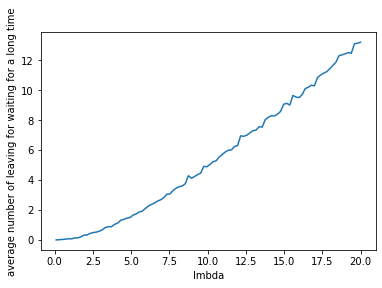

In [76]:
#please keep this line of command
#also remember, do not add np.random.seed() inside your system function
np.random.seed(10) 

def system_N(N,lmbda):
  return np.mean([loopsy(lmbda) for i in range(N)])
#plot the sample average of the sytem output given different alpha value
At_s=[system_N(500, lmbda) for lmbda in np.linspace(0.1,20,100)]
plt.plot(np.linspace(0.1,20,100),At_s)
plt.xlabel("lmbda")
plt.ylabel("average number of leaving for waiting for a long time")
plt.show()


Hi, TA/CA! I have a question of this part. Why it says I have different environments? And how can I change it into correct coding? Thanks!
The coding for HW is upper one. Not this part.

In [0]:

# Hi, TA/CA! I have a question of this part. Why it says I have different environments? And how can I change it into correct coding? Thanks!
# The coding for HW is upper one. Not this part.
np.random.seed(10) 

def arrival(env,service,Outcome,lmbda):
  i=0
  while True:
      inter_arrival=-1/lmbda*np.log(np.random.rand())
      yield env.timeout(inter_arrival)
      i+=1
      print(i,"arrival", env.now)
      env.process(service(i,env,service,Outcome,lmbda))
      Outcome["arrival"].append(env.now)

def service(i,env,service,Outcome,lmbda):
    rqt1=desk.request()
    rqt2=env.timeout(0.1)
    print(i, "request", env.now)
    result=yield simpy.AnyOf(env, [rqt1,rqt2])
    if rqt1 in result:
      print(i,  "start the service", env.now)
      yield env.timeout(0.2)
      print(i, "end the service", env.now)
      desk.release(rqt1)
    else:
      rqt1.cancel()
      Outcome["leave"].append(env.now) 
      print(i, "ran out of patience & did't start a service ", env.now)
    Outcome["depart"].append(env.now) 

def system(lmbda):
  Outcome={"arrival":[],"depart":[],"leave":[]}
  env=simpy.Environment()
  env.process(arrival(env,service,Outcome,lmbda))
  desk=simpy.Resource(env)
  T=1
  env.run(until=T)
  return len(Outcome["leave"])

num=np.mean([system(7) for i in range(500)])
print(Outcome)

#Exercise 3 [15 Points]

##Setting 
Patients arrive at the doctor's office according to a homogenous Poisson process, with $\lambda = 5$.

The receptionist services these patients following a first come first serve order. The service time follows an exponential distribution with $\lambda_1 = 10$. 

Following this, with probability $p = .9$, a patient is sent to regular check-up office. The service order follows first come first serve order. The service time follows an exponential distribution with $\lambda_2 = 10$.   

If the patient is not sent to the regular check-up office, this patient is then sent to full physical-check office.  The service order follows first come first serve order. The service time follows an exponential distribution with $\lambda_3 = 4$.   

After being given a checkup or physical, the customer departs the hospital.


##Q1. [15 Points]

Simulate the system once from t=0 to t=10. Report the average time patients spend in the system for those who left the hospital.


In [0]:
#please keep this line of command
np.random.seed(10) 

Outcome={"arrival":[],"depart":[]}
def arrival():
  i=0
  while True:
    inter_arrival=-1/5*np.log(np.random.rand())
    yield env.timeout(inter_arrival)
    i+=1
    Outcome["arrival"].append((i,env.now))
    env.process(service(i ))

def service(i ):
  #requesting the server
  rqt1=desk1.request()
  yield rqt1
  yield env.timeout(-1/10*np.log(np.random.rand()))
  desk1.release(rqt1)
  #occupy/process the server request
  if np.random.rand()<0.9:
    env.process(regular(i))
  else:
    env.process(full(i))

def regular(i):
  rqt2=desk2.request()
  yield rqt2
  yield env.timeout(-1/10*np.log(np.random.rand()))
  desk2.release(rqt2)
  Outcome["depart"].append((i,env.now))

def full(i):
  rqt3=desk3.request()
  yield rqt3
  yield env.timeout(-1/4*np.log(np.random.rand()))
  desk3.release(rqt3)
  Outcome["depart"].append((i,env.now))

env=simpy.Environment()
env.process(arrival())
desk1=simpy.Resource(env)
desk2=simpy.Resource(env)
desk3=simpy.Resource(env)
T=10
env.run(until=T)


In [0]:
arr=Outcome["arrival"]
dep=Outcome["depart"]
idarr,tmarr=zip(*arr)
iddep,tmdep=zip(*dep)
idarr=list(idarr)
iddep=list(iddep)
tmarr=list(tmarr)
tmdep=list(tmdep)

a=[y for y in (idarr+iddep) if y not in iddep]
b=[idarr.index(i) for i in a]
b.sort(reverse=True)
for i in b:
  del idarr[i]
  del tmarr[i]


In [79]:
result=[]
for i,id in enumerate(iddep):
  for j in idarr:
    if i==j:
      dt=tmdep[i]
      at=tmarr[j]
      result.append(dt-at)

print(np.mean(result))

0.4486192593899378
